## Gezgin Satıcı Probleminin Basit Genetik Algoritma İle Çözülmesi (Populer Travelling Santa Örnek Verisi ile Dumbest ( Aptal yaklaşımlarla ilerleyerek Sonuca Ulaşılmıştır)).

### Kütüphanelerin İnidirlmesi

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import math
import pandas as pd
from sympy import isprime
from multiprocessing import Pool



### Datanın aktarılması

In [8]:
df_cities = pd.read_csv("cities.csv")
df_cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


 Çalışmaya, NP-Complete problemini daha iyi anlayabilmek amacıyla ilk önce bazı basit aptal yaklaşımlarla başlanılmıştır  ve hangi aşamaya götürdükleri test edilmiştir.

Tüm şehirlerin dağılım grafiğinin çıktısı alıyoruz.

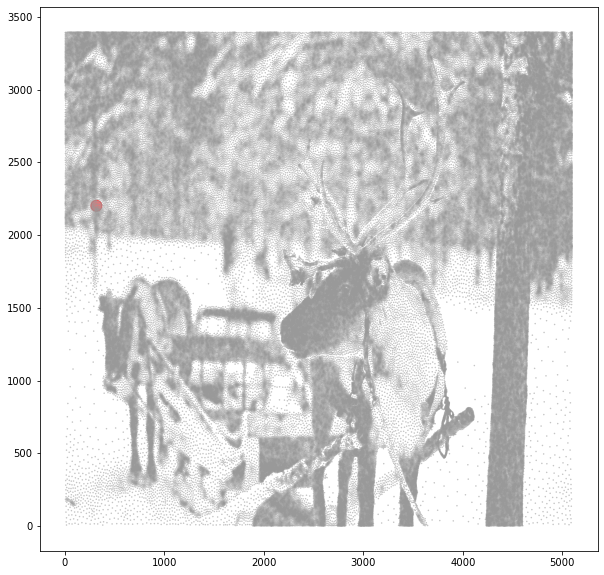

In [7]:
fig = plt.figure(figsize=(10,10))
#cmap, norm = from_levels_and_colors([0.0, 0.5, 1.5], ['red', 'black'])
plt.scatter(df_cities['X'],df_cities['Y'],marker = '.',
            c=(df_cities.CityId != 0).astype(int), cmap='Set1', 
            alpha = 0.6, s = 500*(df_cities.CityId == 0).astype(int)+1)
plt.show()

Şehirler bir ren geyiği düzeninde düzenlenmiş gibi görünüyor.

Kırmızı nokta Kuzey Kutbu'nu gösterir (CityId = 0).

Tek yapmamız gereken, kırmızı noktadan giden, diğer tüm noktalara dokunan ve kat edilen minimum toplam mesafe ile kırmızı noktaya geri dönen bir yol bulmaktır.

#### Dumbest Path-Dumbest güzergah(En Saçma-aptal Yol): CityID'lerin sırasına göre gidin: 0, 1, 2 .. vs. ve sona ulaştığınızda sıfıra geri dönün.

Soruna göre: "gönderim, gönderdiğiniz yolun Öklid mesafesine göre puanlanır, birincil CityId'den gelmedikçe her 10. adımın %10 daha uzun olması kısıtlamasına tabidir."

1-Bu yolun ne kadar iyi olduğunu görmek için birkaç işleve ihtiyacımız var:

2-Bir dizi sayı verilen toplam mesafeyi hesaplamak için başka bir işlev

In [9]:
# The function to get the distance between the cities.
def distance(x1, y1, x2, y2, prev_is_prime, is_10th):
    # Every 10th step is 10% more lengthy unless coming from a prime CityId.
    cost_factor = 1.1 if is_10th and not prev_is_prime else 1.0
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) * cost_factor

# The function to calculate score.

def calculate_score(path, cities_df_dict):
    # The beginning and end of the paths must be City'0'.
    paths = [0]
    paths.extend(path)
    paths.extend([0])

    sum_distance = 0
    prev_x, prev_y = cities_df_dict['X'][0], cities_df_dict['Y'][0]
    prev_is_prime = False

    for i, city in enumerate(paths):
        x, y = cities_df_dict['X'][city], cities_df_dict['Y'][city]
        is_prime = cities_df_dict['IsPrime'][city]

        sum_distance += distance(prev_x, prev_y, x, y, prev_is_prime, i % 10 == 0)
        prev_x, prev_y = x, y
        prev_is_prime = is_prime

    return sum_distance

In [10]:
df_cities['IsPrime'] = df_cities.CityId.apply(isprime)
cities_df_dict       = df_cities.to_dict()

df_cities.head(4)

,CityId,X,Y,IsPrime
0,0,316.836739,2202.340707,False
1,1,4377.405972,336.602082,False
2,2,3454.158198,2820.053011,True
3,3,4688.099298,2935.898056,True


In [11]:
%%time
# test time in calc
sample_path = df_cities.CityId[:].values[1:]
for i in range(100):
    score = calculate_score(sample_path, cities_df_dict)

Wall time: 47 s


#### Dumbest Path(En Aptal Yol)

In [13]:
# start and end in the nort (0)
path  = df_cities.CityId[:].values[1:]
score = calculate_score(path, cities_df_dict)
print('Total distance with the dumbest path is '+ "{:,}".format(score))
#446884407.52

Total distance with the dumbest path is 446,884,407.5212135


Dumbest pat'in (En aptal yolun) ilk 100 adımına bir göz atalım

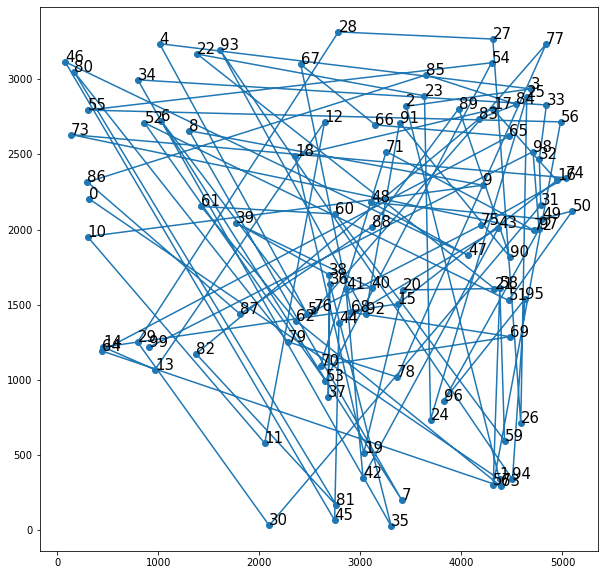

In [15]:
dumbest_path = path

def plot_sample_path(path):
    df_path = pd.merge_ordered(pd.DataFrame({'CityId':path}),df_cities,on=['CityId'])
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(df_path.iloc[0:100,]['X'], df_path.iloc[0:100,]['Y'],marker = 'o')
    for i, txt in enumerate(df_path.iloc[0:100,]['CityId']):
        ax.annotate(txt, (df_path.iloc[0:100,]['X'][i], df_path.iloc[0:100,]['Y'][i]),size = 15)
        
plot_sample_path(dumbest_path)

Gördüğümüz gibi, en aptal yol oldukça kötü görünüyor. Satıcıyı veya Noel Baba'yı hiç düşünmeden haritanın her yerine göndermiş oluyoruz.

In [16]:
df_cities.head(5)

,CityId,X,Y,IsPrime
0,0,316.836739,2202.340707,False
1,1,4377.405972,336.602082,False
2,2,3454.158198,2820.053011,True
3,3,4688.099298,2935.898056,True
4,4,1010.696952,3236.750989,False


In [17]:
print("All cities: ", df_cities.shape)
print("Prime cities: ", df_cities[df_cities.IsPrime].shape)

All cities:  (197769, 4)
Prime cities:  (17802, 4)


### Genetik Algoritma(Genetic Algorithm)

Genetik algoritmalar, Darwin'in evrim teorisinden esinlenmiştir. Genetik algoritmalarla çözülen bir soruna çözüm geliştirilir.Algoritma, popülasyon adı verilen bir dizi çözümle (kromozomlarla temsil edilir) başlatılır. Bir popülasyondan çözümler alınır ve yeni bir popülasyon oluşturmak için kullanılır. Bu, yeni nüfusun eskisinden daha iyi olacağı umuduyla motive edilir. Yeni çözümler (yavrular) oluşturmak için seçilen çözümler uygunluklarına göre seçilir - ne kadar uygun olurlarsa üreme şansları o kadar artar.

[Başlat] Rastgele n kromozom popülasyonu oluşturun (soruna uygun çözümler).


[Uygunluk] Popülasyondaki her bir x kromozomunun uygunluğunu f (x) değerlendirin 


[Yeni popülasyon] Yeni popülasyon tamamlanana kadar aşağıdaki adımları tekrarlayarak yeni bir popülasyon oluşturun


[Seçim] Bir popülasyondan uygunluklarına göre iki ebeveyn kromozomu seçin (daha iyi uygunluk, daha büyük seçilme şansı) 


[Çaprazlama] Çaprazlama olasılığı ile yeni bir yavru (çocuklar) oluşturmak için ebeveynleri çaprazlayın. Çaprazlama yapılmadıysa, yavrular ebeveynlerin tam bir kopyasıdır. 


[Mutasyon] Bir mutasyon olasılığı ile her lokusta yeni yavruları mutasyona uğratın (kromozomdaki konum). 


[Kabul] Yeni yavruları yeni bir popülasyona yerleştirin 


[Değiştirin] Daha sonraki bir algoritma çalışması için yeni oluşturulan popülasyonu kullanın


[Test] Son koşul karşılanırsa, durdurun ve mevcut popülasyondaki en iyi çözümü geri verin 


[Döngü] 2. adıma gidin.

In [20]:
"""Genetic Algorithmn Implementation
see:
http://www.obitko.com/tutorials/genetic-algorithms/ga-basic-description.php
"""
class GeneticAlgorithm(object):
    def __init__(self, genetics):
        self.genetics       = genetics
        self.best_solution  = None
        self.avg_fitness    = []
        pass

    def fitness(self, ch):
        return (self.genetics.fitness(ch),  ch)
    
    def run(self, processes=4):
        population = self.genetics.initial()
        pool       = Pool(processes=processes)
        
        while True:
            fits_pops = [self.fitness(ch) for ch in population]
            fits_pops = list(sorted(fits_pops))
            #fits_pops   = pool.map(self.fitness, population)

            # Log
            self.avg_fitness.append(np.mean([f for f, ch in fits_pops]))
            self.best_solution = fits_pops[0][1]
            
            if self.genetics.check_stop(fits_pops): 
                break
            
            population = self.next(fits_pops)
            pass
        return population

    def next(self, fits):
        parents_generator = self.genetics.parents(fits)
        size  = len(fits)
        nexts = [self.best_solution.copy()]
        while len(nexts) < size:
            parents  = next(parents_generator)
            cross    = random.random() < self.genetics.probability_crossover()
            children = self.genetics.crossover(parents) if cross else parents

            for ch in children:
                mutate = random.random() < self.genetics.probability_mutation()
                nexts.append(self.genetics.mutation(ch) if mutate else ch)
                pass
            pass
        return nexts[0:size]
    pass

### Genetik Algoritma (Genetic Algorithms): Gezgin Satıcı Problemi

In [21]:
class TravelingSanta():
    def __init__(self, df_cities, generation=10, size=5,
                 prob_crossover=0.9, 
                 prob_mutation=0.2):
        self.df_cities  = df_cities
        
        self.counter   = 0
        
        self.generation = generation
        self.size  = size        
        self.prob_crossover = prob_crossover
        self.prob_mutation  = prob_mutation
        self.cities_df_dict = df_cities.to_dict()

    # GeneticFunctions interface impls
    def probability_crossover(self):
        return self.prob_crossover

    def probability_mutation(self):
        return self.prob_mutation

    # Initial population based in s0
    def initial(self):
        population = [self.random_chromo() for j in range(self.size)]
        return population

    def fitness(self, chromo):
        score = calculate_score(chromo, self.cities_df_dict)
        
        return score

    def check_stop(self, fits_populations):
        self.counter += 1
        
        if self.counter % 2 == 0:

            fits  = [f for f, ch in fits_populations]
            best  = min(fits)
            worst = max(fits)
            ave   = sum(fits) / len(fits)
            print(
                "[G %3d] score=(%2f, %2f, %2f, %2f): %r" %
                (self.counter, best, ave, worst, len(fits), []))
            pass

        return self.counter >= self.generation

    def parents(self, fits_populations):
        while True:
            father = self.tournament(fits_populations)
            mother = self.tournament(fits_populations)
            yield (father, mother)
            pass
        pass

    def crossover(self, parents):
        ind1, ind2 = parents
        
        size = min(len(ind1), len(ind2))
        a, b = random.sample(range(size), 2)
        if a > b:
            a, b = b, a

        holes1, holes2 = [True]*size, [True]*size
        for i in range(size):
            if i < a or i > b:
                holes1[ind2[i]-1] = False
                holes2[ind1[i]-1] = False

        # We must keep the original values somewhere before scrambling everything
        temp1, temp2 = ind1, ind2
        k1 , k2 = b + 1, b + 1
        for i in range(size):
            if not holes1[temp1[(i + b + 1) % size]-1]:
                ind1[k1 % size] = temp1[(i + b + 1) % size]
                k1 += 1

            if not holes2[temp2[(i + b + 1) % size]-1]:
                ind2[k2 % size] = temp2[(i + b + 1) % size]
                k2 += 1

        # Swap the content between a and b (included)
        for i in range(a, b + 1):
            ind1[i], ind2[i] = ind2[i], ind1[i]

        return ind1, ind2

    def mutation(self, chromosome):
        mutated = chromosome
        
        for i in range(int(len(chromosome)*0.05)):
            i1 = random.randint(0, len(chromosome)-1)
            i2 = random.randint(0, len(chromosome)-1)
        
            origin       = mutated[i1]
            mutated[i1]  = mutated[i2]
            mutated[i2]  = origin

        return mutated

    def tournament(self, fits_populations):
        alicef, alice = self.select_random(fits_populations)
        bobf, bob = self.select_random(fits_populations)
        return alice if alicef < bobf else bob

    def select_random(self, fits_populations):
        return fits_populations[random.randint(0, len(fits_populations)-1)]

    def random_chromo(self):
        chromo = list(df_cities.CityId.sample(frac=1).values)
        return chromo
    pass

 ### Genetik Algoritma Hesaplama

In [22]:
%%time

generation      = 100
population_size = 100
prob_crossover  = 0.9
prob_mutation   = 0.2

ga = GeneticAlgorithm(
    TravelingSanta(df_cities, generation=generation, size=population_size, 
                   prob_crossover=prob_crossover, prob_mutation=prob_mutation)
)

best_solution = ga.run()

[G   2] score=(446019704.385978, 446851710.627792, 448011101.437484, 100.000000): []
[G   4] score=(445522280.139295, 446784774.812330, 447588054.261119, 100.000000): []
[G   6] score=(445522280.139295, 446787437.755639, 447515504.611075, 100.000000): []
[G   8] score=(445522280.139295, 447215292.640705, 447676794.083996, 100.000000): []
[G  10] score=(445522280.139295, 446938037.193604, 447503582.575387, 100.000000): []
[G  12] score=(445522280.139295, 446523623.361031, 447250968.626129, 100.000000): []
[G  14] score=(445522280.139295, 447482236.601615, 447672235.209509, 100.000000): []
[G  16] score=(445291944.545695, 446716072.937753, 446810702.959387, 100.000000): []
[G  18] score=(445291944.545695, 446436430.187250, 447306317.449490, 100.000000): []
[G  20] score=(445291944.545695, 446243165.801653, 447611516.199180, 100.000000): []
[G  22] score=(445291944.545695, 447573391.090323, 447713860.612563, 100.000000): []
[G  24] score=(445291944.545695, 446978327.834071, 447354065.3475

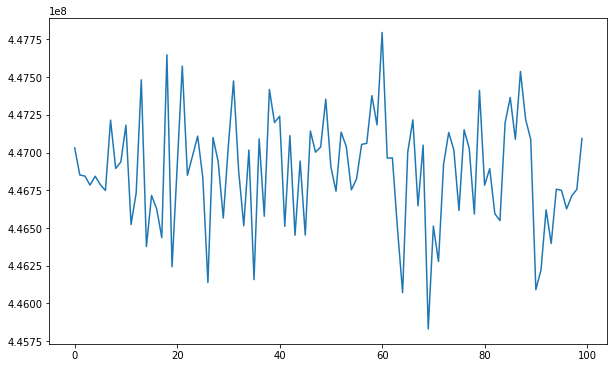

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ga.avg_fitness)

In [24]:
calculate_score(ga.best_solution, cities_df_dict)

445257917.37334096

### Çıktı 

In [25]:
path       = [0] + ga.best_solution + [0]
submission = pd.DataFrame({"Path": path})
submission.to_csv("gezgin_satıcı_problemi_output_ga.csv", index=None)